In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '../modules/')
import model
import utils

# Comparison with Hanski & Ovaskainen (2000) model

In [4]:
N = 75

In [25]:
N_modules = 5
Nodes_per_module = [N//N_modules]*N_modules

Nconn_per_node = 1

seed = 42

cumsum = np.concatenate([[0], np.cumsum(Nodes_per_module)])

p_intra = 0.3
p_connect = 0.1

modular_network, edges_modular = utils.generate_modular_ER(Nodes_per_module, N_modules, p_intra, p_connect)

In [26]:
f_array = np.geomspace(1e-3, 1e3, 25)
xi_array = np.array([1, 5, 10])

In [27]:
LambdaMOD, LambdaMOD_Hanski, alphas_MOD = model.iterate_and_compare(f_array, xi_array, modular_network)

In [18]:
net_RI = nx.cycle_graph(N)

p_SW = 0.3
net_SW = nx.connected_watts_strogatz_graph(N, 2, p_SW)

net_BA = nx.barabasi_albert_graph(N, 1)

distmatrix_RI, _ = utils.find_distance_matrix(net_RI)
distmatrix_SW, _ = utils.find_distance_matrix(net_SW)
distmatrix_BA, _ = utils.find_distance_matrix(net_BA)

In [19]:
LambdaRI, LambdaRI_Hanski, alphas_RI = model.iterate_and_compare(f_array, xi_array, net_RI)
LambdaSW, LambdaSW_Hanski, alphas_SW = model.iterate_and_compare(f_array, xi_array, net_SW)
LambdaBA, LambdaBA_Hanski, alphas_BA = model.iterate_and_compare(f_array, xi_array, net_BA)

In [20]:
nets_list = [net_RI, net_SW, net_BA, modular_network]
alphas_list = [alphas_RI, alphas_SW, alphas_BA, alphas_MOD]
Lambda_list = [LambdaRI, LambdaSW, LambdaBA, LambdaMOD]
LambdaHanski_list = [LambdaRI_Hanski, LambdaSW_Hanski, LambdaBA_Hanski, LambdaMOD_Hanski]

colors = ["#264653", "#2a9d8f", "#e76f51"]

titles = ["Ring", "Small-world", "Barabasi-Albert", "Modular"]

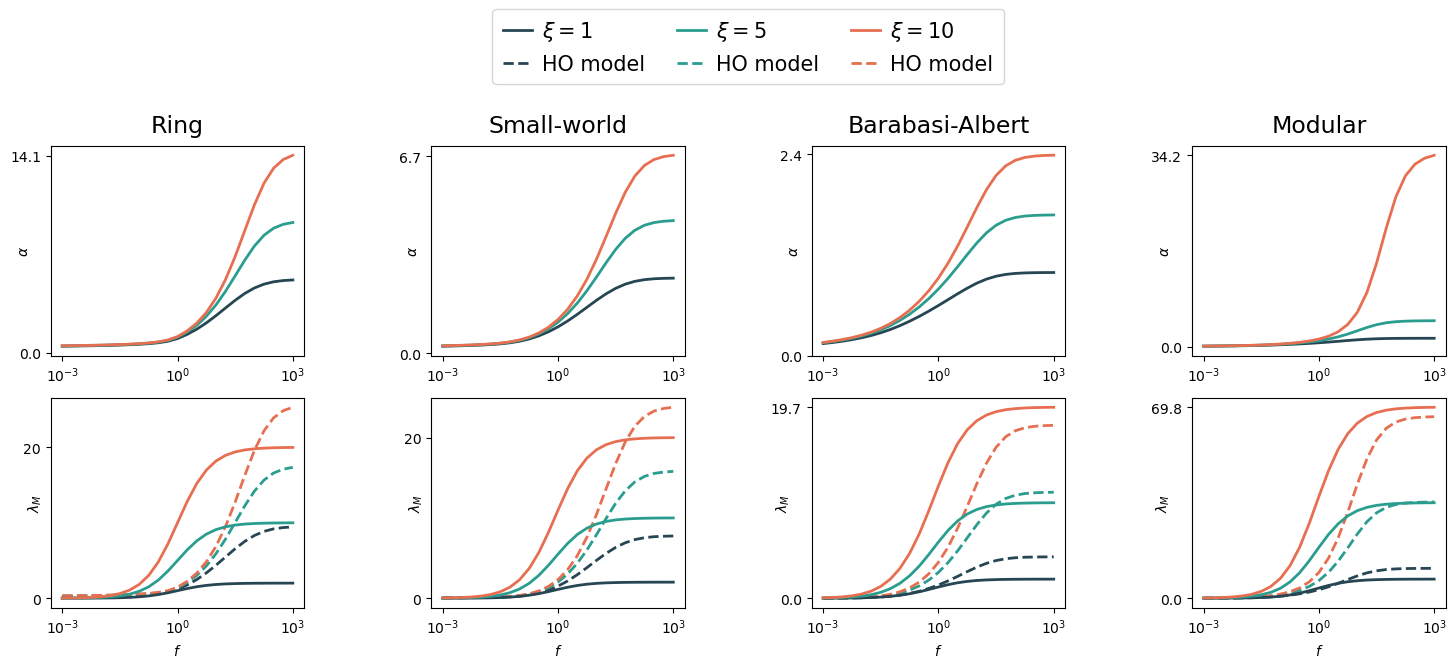

In [28]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize=(18, 6))

for _, ax in np.ndenumerate(axs):
    ax.set_xscale('log')
    ax.set_xticks([1e-3, 1e0, 1e3])

for idx, ax in enumerate(axs[0]):
    for idx_xi in range(xi_array.size):
        ax.plot(f_array, alphas_list[idx][:,idx_xi], color = colors[idx_xi], lw = 2)
    ax.set_ylabel(r'$\alpha$', labelpad = -15)
    ax.set_title(titles[idx], pad = 10, fontsize = 17)
    ax.set_yticks([0, np.round(alphas_list[idx].max(), 1)])

for idx, ax in enumerate(axs[1]):
    for idx_xi in range(xi_array.size):
        ax.plot(f_array, Lambda_list[idx][:,idx_xi], color = colors[idx_xi], lw = 2, label = r'$\xi = $' + str(xi_array[idx_xi]))
        ax.plot(f_array, LambdaHanski_list[idx][:,idx_xi], color = colors[idx_xi], lw = 2, ls = '--', label = 'HO model', zorder = -1)
    ax.set_ylabel(r'$\lambda_M$', labelpad = -15)
    ax.set_xlabel(r'$f$', labelpad = 5)
    ax.set_yticks([0, np.round(Lambda_list[idx].max(), 1)])

axs[1,1].legend(loc = 'upper center', bbox_to_anchor = (1.25, 2.9), ncol = 3, fontsize = 15,
                columnspacing = 1.5, handletextpad = 0.5, borderpad = 0.5, handlelength = 1.4)

plt.subplots_adjust(wspace = 0.5, hspace = 0.2)
plt.show()